# Try out framework with 5-cohort MA data

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

from q2_time.process_data import load_n_split_data
from q2_time.tune_models import run_all_trials
from q2_time.evaluate_models import get_best_model, get_best_data_processing
from q2_time.engineer_features import transform_features
from q2_time.config import HOST_ID, TARGET
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# 30.437 is avg. number of days per month
DAYS_PER_MONTH = 30.437
%matplotlib inline
%load_ext autoreload
%autoreload 2

2023-09-26 17:50:19.703124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load and split data

In [2]:
data_dir = "data/220728_monthly"
path2md = os.path.join(data_dir, "metadata_proc_v20230824.tsv")
path2ft = os.path.join(data_dir, "all_otu_table.qza")
train_val, test = load_n_split_data(path2md, path2ft, [HOST_ID, TARGET])

Train: (7828, 6013), Test: (1957, 6013)


## Run all experiments

In [3]:
result_dic = run_all_trials(train_val, model_types=["xgb", "nn", "linreg", "rf"])
result_dic

Ray tune training of: xgb...


2023-09-26 17:50:32,059	INFO worker.py:1625 -- Started a local Ray instance.
2023-09-26 17:50:33,777	INFO tune.py:218 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
/Users/anjaadamov/opt/anaconda3/envs/time/lib/python3.8/site-packages/ray/tune/experiment/experiment.py:170: UserWarning: The `local_dir` argument of `Experiment is deprecated. Use `storage_path` or set the `TUNE_RESULT_DIR` environment variable instead.
  warnings.warn(


(train_xgb pid=84044) Train: (6446, 6013), Test: (1382, 6013)


(train_xgb pid=84044) [17:50:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
(train_xgb pid=84044) Parameters: { "data_alr_denom_idx" } are not used.
(train_xgb pid=84044) 


(train_xgb pid=84057) Train: (6446, 6013), Test: (1382, 6013)


(train_xgb pid=84057) Parameters: { "data_alr_denom_idx", "data_transform" } are not used.
(train_xgb pid=84057) 
(train_xgb pid=84057) 


(train_xgb pid=84057) [0]	train-rmse:718.84981	val-rmse:634.19954
(train_xgb pid=84086) Train: (6446, 6012), Test: (1382, 6012)


(train_xgb pid=84086) [17:51:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
(train_xgb pid=84086) 
(train_xgb pid=84086) 


(train_xgb pid=84098) Train: (6446, 6013), Test: (1382, 6013)
(train_xgb pid=84068) Train: (6446, 6012), Test: (1382, 6012)


(train_xgb pid=84098) Parameters: { "data_alr_denom_idx" } are not used.
(train_xgb pid=84098) 
(train_xgb pid=84098) 
(train_xgb pid=84068) [17:51:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
(train_xgb pid=84068) Parameters: { "data_alr_denom_idx", "data_transform" } are not used.
(train_xgb pid=84068) 


(train_xgb pid=84113) Train: (6446, 6013), Test: (1382, 6013)


(train_xgb pid=84113) 
(train_xgb pid=84113) 
(train_xgb pid=84113) 


(train_xgb pid=84068) [0]	train-rmse:692.70777	val-rmse:611.64049


Trial name,date,done,experiment_tag,hostname,iterations_since_restore,node_ip,pid,rmse_train,rmse_val,time_since_restore,time_this_iter_s,time_total_s,timestamp,training_iteration,trial_id
train_xgb_b57e0_00000,2023-09-26_17-52-27,True,"0_data_alr_denom_idx=11,data_transform=None,eta=0.0500,max_depth=6,min_child_weight=2,subsample=0.8000",fsbt142-114,10,127.0.0.1,84044,470.559,417.031,102.905,3.00848,102.905,1695765147,10,b57e0_00000
train_xgb_b57e0_00001,2023-09-26_17-52-32,True,,fsbt142-114,5,127.0.0.1,84057,693.613,611.611,98.5526,6.71076,98.5526,1695765152,5,b57e0_00001
train_xgb_b57e0_00002,2023-09-26_17-52-37,True,,fsbt142-114,5,127.0.0.1,84068,578.121,512.184,93.095,6.43067,93.095,1695765157,5,b57e0_00002
train_xgb_b57e0_00003,2023-09-26_17-52-12,True,,fsbt142-114,5,127.0.0.1,84086,693.859,612.501,56.868,4.41007,56.868,1695765132,5,b57e0_00003
train_xgb_b57e0_00004,2023-09-26_17-52-27,True,"4_data_alr_denom_idx=4,data_transform=None,eta=0.0100,max_depth=6,min_child_weight=1,subsample=0.9000",fsbt142-114,10,127.0.0.1,84098,663.651,585.295,61.3428,3.15859,61.3428,1695765147,10,b57e0_00004
train_xgb_b57e0_00005,2023-09-26_17-53-14,True,"5_data_alr_denom_idx=18,data_transform=clr,eta=0.3000,max_depth=9,min_child_weight=2,subsample=0.7000",fsbt142-114,10,127.0.0.1,84113,113.423,199.945,98.909,6.57395,98.909,1695765194,10,b57e0_00005
train_xgb_b57e0_00006,2023-09-26_17-52-55,True,,fsbt142-114,5,127.0.0.1,84122,693.62,611.844,72.8026,4.56629,72.8026,1695765175,5,b57e0_00006
train_xgb_b57e0_00007,2023-09-26_17-52-44,True,"7_data_alr_denom_idx=0,data_transform=alr,eta=0.0500,max_depth=9,min_child_weight=3,subsample=1.0000",fsbt142-114,10,127.0.0.1,84131,461.679,414.884,52.5072,2.42395,52.5072,1695765164,10,b57e0_00007


(train_xgb pid=84098) [0]	train-rmse:718.86739	val-rmse:634.08315
(train_xgb pid=84086) [0]	train-rmse:718.91596	val-rmse:634.29446
(train_xgb pid=84131) Train: (6446, 6012), Test: (1382, 6012)
(train_xgb pid=84113) [0]	train-rmse:530.05348	val-rmse:474.60456 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(train_xgb pid=84098) [2]	train-rmse:706.13527	val-rmse:622.82655 [repeated 4x across cluster]


(train_xgb pid=84131) [17:52:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
(train_xgb pid=84131) Parameters: { "data_alr_denom_idx", "data_transform" } are not used.
(train_xgb pid=84131) 


(train_xgb pid=84086) [3]	train-rmse:700.02682	val-rmse:617.88887 [repeated 6x across cluster]
(train_xgb pid=84098) [5]	train-rmse:687.51918	val-rmse:606.31100 [repeated 5x across cluster]
(train_xgb pid=84098) [7]	train-rmse:675.43989	val-rmse:595.63084 [repeated 7x across cluster]
(train_xgb pid=84122) Train: (6446, 6012), Test: (1382, 6012)
(train_xgb pid=84044) [9]	train-rmse:470.55913	val-rmse:417.03086 [repeated 8x across cluster]


(train_xgb pid=84122) 
(train_xgb pid=84122) 
(train_xgb pid=84122) 


(train_xgb pid=84057) [4]	train-rmse:693.61321	val-rmse:611.61147 [repeated 5x across cluster]
(train_xgb pid=84131) [6]	train-rmse:526.94689	val-rmse:469.27908 [repeated 4x across cluster]
(train_xgb pid=84131) [9]	train-rmse:461.67916	val-rmse:414.88384 [repeated 6x across cluster]
(train_xgb pid=84122) [3]	train-rmse:699.83095	val-rmse:617.36743 [repeated 3x across cluster]
(train_xgb pid=84113) [7]	train-rmse:130.57934	val-rmse:203.22965 [repeated 2x across cluster]
(train_xgb pid=84113) [8]	train-rmse:120.77817	val-rmse:200.43489
(train_xgb pid=84113) [9]	train-rmse:113.42317	val-rmse:199.94455


2023-09-26 17:53:14,183	INFO tune.py:945 -- Total run time: 160.40 seconds (160.34 seconds for the tuning loop).


Ray tune training of: nn...


(train_nn pid=84184) Train: (6446, 6013), Test: (1382, 6013)


(train_nn pid=84184) 2023/09/26 17:53:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'af6deafff9db49c49fd0b005b93fcb9d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84184) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0064s). Check your callbacks.
(train_nn pid=84184) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


(train_nn pid=84193) Train: (6446, 6013), Test: (1382, 6013)


(train_nn pid=84193) 2023/09/26 17:53:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dc4f9471fd974971852361ed1c6818cf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84193) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0035s vs `on_train_batch_end` time: 0.0037s). Check your callbacks.
(train_nn pid=84193) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


(train_nn pid=84224) Train: (6446, 6012), Test: (1382, 6012)


(train_nn pid=84224) 2023/09/26 17:53:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1e1d91352d324d159509de764c35d693', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84224) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0037s vs `on_train_batch_end` time: 0.0038s). Check your callbacks.
(train_nn pid=84224) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


(train_nn pid=84234) Train: (6446, 6013), Test: (1382, 6013)


(train_nn pid=84234) 2023/09/26 17:54:00 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c1f13f7a170a45f9899f15bcd37dc1a2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84234) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0036s vs `on_train_batch_end` time: 0.0072s). Check your callbacks.


(train_nn pid=84205) Train: (6446, 6012), Test: (1382, 6012)


(train_nn pid=84205) 2023/09/26 17:54:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1075b1d220c64a1bbbd19e899006f6c0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84234) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.
(train_nn pid=84205) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.
(train_nn pid=84246) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0036s vs `on_train_batch_end` time: 0.0041s). Check your callbacks.
(train_nn pid=84246) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0036s vs `on_train_batch_end` time: 0.004

Trial name,date,done,hostname,iterations_since_restore,node_ip,pid,rmse_train,rmse_val,should_checkpoint,time_since_restore,time_this_iter_s,time_total_s,timestamp,training_iteration,trial_id
train_nn_17e59_00000,2023-09-26_17-54-42,True,fsbt142-114,5,127.0.0.1,84184,409.352,1346.47,True,76.4062,3.65483,76.4062,1695765282,5,17e59_00000
train_nn_17e59_00001,2023-09-26_17-56-58,True,fsbt142-114,100,127.0.0.1,84193,56.9468,282.114,True,204.625,1.45313,204.625,1695765418,100,17e59_00001
train_nn_17e59_00002,2023-09-26_17-54-43,True,fsbt142-114,5,127.0.0.1,84205,425.034,350.43,True,62.2397,4.11289,62.2397,1695765283,5,17e59_00002
train_nn_17e59_00003,2023-09-26_17-54-37,True,fsbt142-114,5,127.0.0.1,84224,96077.7,238461,True,48.4303,3.7091,48.4303,1695765277,5,17e59_00003
train_nn_17e59_00004,2023-09-26_17-54-47,True,fsbt142-114,5,127.0.0.1,84234,409.584,1730.43,True,50.2504,4.69974,50.2504,1695765287,5,17e59_00004
train_nn_17e59_00005,2023-09-26_17-57-39,True,fsbt142-114,100,127.0.0.1,84246,60.1761,237.872,True,213.043,1.42942,213.043,1695765459,100,17e59_00005
train_nn_17e59_00006,2023-09-26_17-57-30,True,fsbt142-114,100,127.0.0.1,84268,34.6074,229.165,True,196.169,1.34911,196.169,1695765450,100,17e59_00006
train_nn_17e59_00007,2023-09-26_17-54-55,True,fsbt142-114,5,127.0.0.1,84280,87808.3,73951.6,True,33.1207,3.06374,33.1207,1695765295,5,17e59_00007


(train_nn pid=84224) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.
(train_nn pid=84193) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading.


(train_nn pid=84280) Train: (6446, 6012), Test: (1382, 6012) [repeated 2x across cluster]


(train_nn pid=84280) 2023/09/26 17:54:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ff1455d4e09840eab30bc8ce4a982860', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84184) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading. [repeated 8x across cluster]
(train_nn pid=84280) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0042s vs `on_train_batch_end` time: 0.0107s). Check your callbacks.
(train_nn pid=84184) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading. [repeated 8x across cluster]
(train_nn pid=84193) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of

(train_nn pid=84268) Train: (6446, 6012), Test: (1382, 6012)
(train_nn pid=84268) 


(train_nn pid=84193) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading. [repeated 6x across cluster]
(train_nn pid=84268) 2023/09/26 17:54:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '46293e6168174b038e7215ff7e168001', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
(train_nn pid=84268) WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0031s vs `on_train_batch_end` time: 0.0056s). Check your callbacks.
(train_nn pid=84268) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of 1). These functions will not be directly callable after loading. [repeated 9x across cluster]
(train_nn pid=84193) WARNING:absl:Found untraced functions such as _update_step_xla while saving (showing 1 of

Ray tune training of: linreg...


(train_linreg pid=84388) Train: (6446, 6013), Test: (1382, 6013)
(train_linreg pid=84398) Train: (6446, 6013), Test: (1382, 6013)
(train_linreg pid=84416) Train: (6446, 6012), Test: (1382, 6012)
(train_linreg pid=84431) Train: (6446, 6013), Test: (1382, 6013)
(train_linreg pid=84407) Train: (6446, 6012), Test: (1382, 6012)
(train_linreg pid=84441) Train: (6446, 6013), Test: (1382, 6013)
(train_linreg pid=84466) Train: (6446, 6012), Test: (1382, 6012)
(train_linreg pid=84450) Train: (6446, 6012), Test: (1382, 6012)


Trial name,date,done,experiment_tag,hostname,iterations_since_restore,model_path,node_ip,pid,rmse_train,rmse_val,time_since_restore,time_this_iter_s,time_total_s,timestamp,training_iteration,trial_id
train_linreg_b5e7d_00000,2023-09-26_18-01-05,True,"0_data_alr_denom_idx=11,data_transform=None,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00000_0_data_alr_denom_idx=11,data_transform=None,fit_intercept=True_2023-09-26_17-57-41/model.pkl",127.0.0.1,84388,203.336,5.988e+11,196.038,196.038,196.038,1695765665,1,b5e7d_00000
train_linreg_b5e7d_00001,2023-09-26_18-01-33,True,"1_data_alr_denom_idx=6,data_transform=clr,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00001_1_data_alr_denom_idx=6,data_transform=clr,fit_intercept=True_2023-09-26_17-57-49/model.pkl",127.0.0.1,84398,134.798,3.64363e+14,216.332,216.332,216.332,1695765693,1,b5e7d_00001
train_linreg_b5e7d_00002,2023-09-26_18-02-42,True,"2_data_alr_denom_idx=17,data_transform=ilr,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00002_2_data_alr_denom_idx=17,data_transform=ilr,fit_intercept=True_2023-09-26_17-57-57/model.pkl",127.0.0.1,84407,134.287,3.84177e+14,277.162,277.162,277.162,1695765762,1,b5e7d_00002
train_linreg_b5e7d_00003,2023-09-26_18-02-19,True,"3_data_alr_denom_idx=2,data_transform=alr,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00003_3_data_alr_denom_idx=2,data_transform=alr,fit_intercept=True_2023-09-26_17-58-05/model.pkl",127.0.0.1,84416,209.07,1.98856e+12,243.216,243.216,243.216,1695765739,1,b5e7d_00003
train_linreg_b5e7d_00004,2023-09-26_18-02-39,True,"4_data_alr_denom_idx=13,data_transform=None,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00004_4_data_alr_denom_idx=13,data_transform=None,fit_intercept=True_2023-09-26_17-58-16/model.pkl",127.0.0.1,84431,203.336,5.988e+11,249.11,249.11,249.11,1695765759,1,b5e7d_00004
train_linreg_b5e7d_00005,2023-09-26_18-02-51,True,"5_data_alr_denom_idx=2,data_transform=clr,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00005_5_data_alr_denom_idx=2,data_transform=clr,fit_intercept=True_2023-09-26_17-58-30/model.pkl",127.0.0.1,84441,134.798,3.64363e+14,243.831,243.831,243.831,1695765771,1,b5e7d_00005
train_linreg_b5e7d_00006,2023-09-26_18-03-24,True,"6_data_alr_denom_idx=11,data_transform=ilr,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00006_6_data_alr_denom_idx=11,data_transform=ilr,fit_intercept=True_2023-09-26_17-58-47/model.pkl",127.0.0.1,84450,134.287,3.84177e+14,254.038,254.038,254.038,1695765804,1,b5e7d_00006
train_linreg_b5e7d_00007,2023-09-26_18-03-11,True,"7_data_alr_denom_idx=10,data_transform=alr,fit_intercept=True",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/linreg/train_linreg_b5e7d_00007_7_data_alr_denom_idx=10,data_transform=alr,fit_intercept=True_2023-09-26_17-59-10/model.pkl",127.0.0.1,84466,204.407,2.03087e+12,214.013,214.013,214.013,1695765791,1,b5e7d_00007


2023-09-26 18:03:24,247	INFO tune.py:945 -- Total run time: 344.68 seconds (344.65 seconds for the tuning loop).


Ray tune training of: rf...


(train_rf pid=84661) Train: (6446, 6013), Test: (1382, 6013)
(train_rf pid=84679) Train: (6446, 6013), Test: (1382, 6013)
(train_rf pid=84781) Train: (6446, 6012), Test: (1382, 6012)
(train_rf pid=84821) Train: (6446, 6013), Test: (1382, 6013)
(train_rf pid=84691) Train: (6446, 6012), Test: (1382, 6012)
(train_rf pid=84833) Train: (6446, 6013), Test: (1382, 6013)
(train_rf pid=84864) Train: (6446, 6012), Test: (1382, 6012)
(train_rf pid=84852) Train: (6446, 6012), Test: (1382, 6012)


Trial name,date,done,experiment_tag,hostname,iterations_since_restore,model_path,node_ip,pid,rmse_train,rmse_val,time_since_restore,time_this_iter_s,time_total_s,timestamp,training_iteration,trial_id
train_rf_837d6_00000,2023-09-26_18-12-21,True,"0_bootstrap=True,data_alr_denom_idx=11,data_transform=None,max_depth=8,max_features=log2,min_impurity_decrease=0.0001,min_samples_leaf=0.0001,min_samples_split=0.0010,n_estimators=767",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00000_0_bootstrap=True,data_alr_denom_idx=11,data_transform=None,max_depth=8,max_features=log2,min_impurity_decreas_2023-09-26_18-03-27/model.pkl",127.0.0.1,84661,171.724,199.663,524.55,524.55,524.55,1695766341,1,837d6_00000
train_rf_837d6_00001,2023-09-27_00-12-34,True,"1_bootstrap=False,data_alr_denom_idx=17,data_transform=clr,max_depth=27,max_features=log2,min_impurity_decrease=0.0001,min_samples_leaf=0.0010,min_samples_split=0.0100,n_estimators=753",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00001_1_bootstrap=False,data_alr_denom_idx=17,data_transform=clr,max_depth=27,max_features=log2,min_impurity_decrea_2023-09-26_18-03-37/model.pkl",127.0.0.1,84679,74.7182,189.508,22129.5,22129.5,22129.5,1695787954,1,837d6_00001
train_rf_837d6_00002,2023-09-26_20-33-06,True,"2_bootstrap=True,data_alr_denom_idx=8,data_transform=ilr,max_depth=15,max_features=0.1000,min_impurity_decrease=0.0100,min_samples_leaf=0.0001,min_samples_split=0.0100,n_estimators=304",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00002_2_bootstrap=True,data_alr_denom_idx=8,data_transform=ilr,max_depth=15,max_features=0.1000,min_impurity_decrea_2023-09-26_18-03-45/model.pkl",127.0.0.1,84691,96.2184,190.144,8953.81,8953.81,8953.81,1695774786,1,837d6_00002
train_rf_837d6_00003,2023-09-26_18-35-46,True,"3_bootstrap=True,data_alr_denom_idx=3,data_transform=alr,max_depth=25,max_features=log2,min_impurity_decrease=0.0100,min_samples_leaf=0.0000,min_samples_split=0.1000,n_estimators=517",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00003_3_bootstrap=True,data_alr_denom_idx=3,data_transform=alr,max_depth=25,max_features=log2,min_impurity_decrease_2023-09-26_18-03-52/model.pkl",127.0.0.1,84781,81.13,192.262,1904.42,1904.42,1904.42,1695767746,1,837d6_00003
train_rf_837d6_00004,2023-09-26_18-18-14,True,"4_bootstrap=False,data_alr_denom_idx=16,data_transform=None,max_depth=16,max_features=0.1000,min_impurity_decrease=0.0001,min_samples_leaf=0.0001,min_samples_split=0.1000,n_estimators=772",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00004_4_bootstrap=False,data_alr_denom_idx=16,data_transform=None,max_depth=16,max_features=0.1000,min_impurity_dec_2023-09-26_18-04-01/model.pkl",127.0.0.1,84821,102.856,185.175,841.608,841.608,841.608,1695766694,1,837d6_00004
train_rf_837d6_00005,2023-09-26_21-17-20,True,"5_bootstrap=False,data_alr_denom_idx=1,data_transform=clr,max_depth=6,max_features=sqrt,min_impurity_decrease=0.0001,min_samples_leaf=0.0000,min_samples_split=0.0001,n_estimators=924",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00005_5_bootstrap=False,data_alr_denom_idx=1,data_transform=clr,max_depth=6,max_features=sqrt,min_impurity_decrease_2023-09-26_18-04-12/model.pkl",127.0.0.1,84833,199.55,211.398,11573.7,11573.7,11573.7,1695777440,1,837d6_00005
train_rf_837d6_00006,2023-09-26_21-16-03,True,"6_bootstrap=False,data_alr_denom_idx=11,data_transform=ilr,max_depth=21,max_features=0.1000,min_impurity_decrease=0.0010,min_samples_leaf=0.0001,min_samples_split=0.0001,n_estimators=345",fsbt142-114,1,"/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/rf/train_rf_837d6_00006_6_bootstrap=False,data_alr_denom_idx=1

2023-09-27 00:12:34,825	INFO tune.py:945 -- Total run time: 22150.34 seconds (22150.31 seconds for the tuning loop).


{'xgb': ResultGrid<[
   Result(
     metrics={'rmse_train': 470.55912761737534, 'rmse_val': 417.03086449508567, 'done': True, 'trial_id': 'b57e0_00000', 'experiment_tag': '0_data_alr_denom_idx=11,data_transform=None,eta=0.0500,max_depth=6,min_child_weight=2,subsample=0.8000'},
     path='/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/xgb/train_xgb_b57e0_00000_0_data_alr_denom_idx=11,data_transform=None,eta=0.0500,max_depth=6,min_child_weight=2,subsample=0.8000_2023-09-26_17-50-34',
     checkpoint=Checkpoint(local_path=/Users/anjaadamov/Documents/projects/14_LM1/q2-time/experiments/ray_results/xgb/train_xgb_b57e0_00000_0_data_alr_denom_idx=11,data_transform=None,eta=0.0500,max_depth=6,min_child_weight=2,subsample=0.8000_2023-09-26_17-50-34/checkpoint_000005)
   ),
   Result(
     metrics={'rmse_train': 693.6132098814278, 'rmse_val': 611.6114671698385, 'done': True, 'trial_id': 'b57e0_00001', 'experiment_tag': '1_data_alr_denom_idx=2,data_transform=clr,eta=0

## Evaluate best models

In [4]:
class TunedModel:
    def __init__(self, model, data_config):
        self.model = model
        self.data_config = data_config

    def transform(self, data):
        transformed = transform_features(
            data,
            self.data_config["data_transform"],
            self.data_config["data_alr_denom_idx"],
        )
        if isinstance(self.model, xgb.core.Booster):
            return xgb.DMatrix(transformed)
        else:
            return transformed.values

    def predict(self, data):
        transformed = self.transform(data)
        predicted = self.model.predict(transformed)
        return predicted.flatten()

In [5]:
best_model_dic = {}
for model_type, result_grid in result_dic.items():
    best_model = get_best_model(model_type, result_grid)
    best_data_proc = get_best_data_processing(result_grid)

    best_model_dic[model_type] = TunedModel(best_model, best_data_proc)

best_model_dic

{'xgb': <__main__.TunedModel at 0x7fed28567f70>,
 'nn': <__main__.TunedModel at 0x7fed291031c0>,
 'linreg': <__main__.TunedModel at 0x7fecdb7336d0>,
 'rf': <__main__.TunedModel at 0x7fecdbc45370>}

In [6]:
# ! Perform predictions with best model
def save_predictions(data, tmodel, target, features, split=None):
    # id, true
    saved_pred = data[[target]].copy()
    saved_pred.rename(columns={target: "true"}, inplace=True)
    # pred, split
    saved_pred["pred"] = tmodel.predict(data[features])
    saved_pred["split"] = split
    return saved_pred


non_features = [TARGET, HOST_ID]
features = [x for x in train_val if x not in non_features]

# dic with model_type: df with all predictions within
preds_dic = {}
for model_type, tmodel in best_model_dic.items():
    train_df = save_predictions(train_val, tmodel, TARGET, features, "train")
    test_pred = save_predictions(test, tmodel, TARGET, features, "test")

    preds_dic[model_type] = pd.concat([train_df, test_pred])

62/62 [==============================] - 0s 1ms/step


<AxesSubplot: title={'center': 'Overall'}, ylabel='RMSE'>

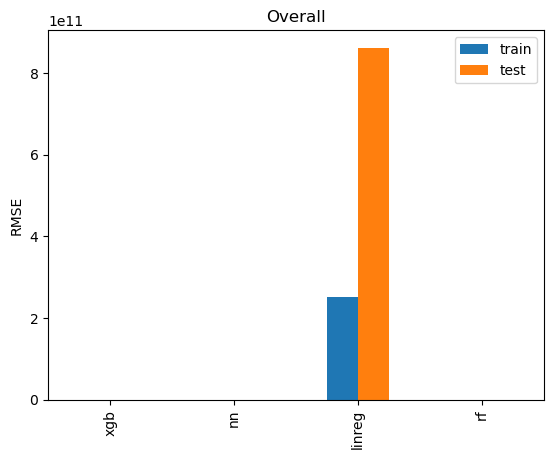

In [7]:
# plot rmse over all experiments # !(OVERALL case)
def _calculate_rmse(pred_df):
    rmse_scores = {}
    for split in pred_df["split"].unique():
        pred_split = pred_df[pred_df["split"] == split].copy()
        rmse = mean_squared_error(
            pred_split["true"].values, pred_split["pred"].values, squared=False
        )
        rmse_scores[split] = rmse
    return rmse_scores


rmse_dic = {}
for model_type, pred_df in preds_dic.items():
    # todo: add a bin_by variable (for "over time" and "over study")
    rmse_dic[model_type] = _calculate_rmse(pred_df)

rmse_df = pd.DataFrame(rmse_dic).T
rmse_df.plot(kind="bar", title="Overall", ylabel="RMSE")

<AxesSubplot: title={'center': 'Model: rf'}, xlabel='group', ylabel='RMSE'>

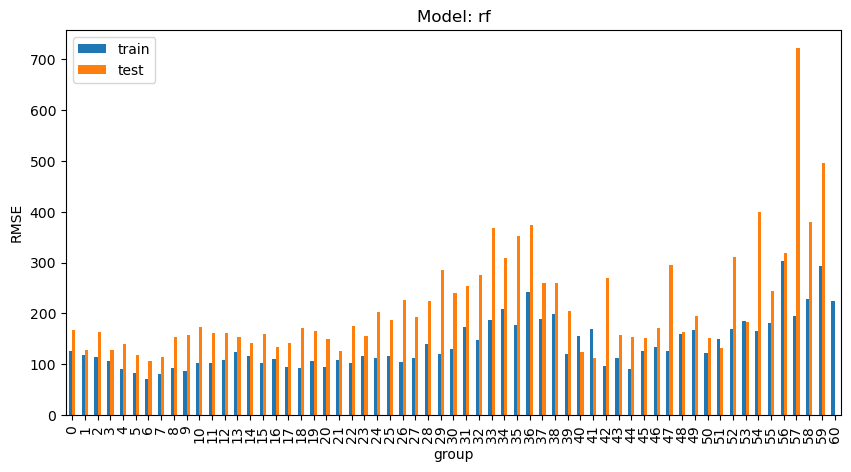

In [8]:
# plot rmse over true time bin
# ! (TIME case)
model_type = "rf"
pred_df = preds_dic[model_type]
split = None

# bin true columns by months
pred_df["group"] = np.round(pred_df["true"] / DAYS_PER_MONTH, 0).astype(int)

grouped_ser = pred_df.groupby(["group"]).apply(_calculate_rmse)
grouped_df = grouped_ser.apply(pd.Series)
if split is not None:
    grouped_df = grouped_df[[split]].copy()

grouped_df.plot(
    kind="bar", title=f"Model: {model_type}", ylabel="RMSE", figsize=(10, 5)
)

## Compare experiments

In [19]:
def get_best_model(exp_name, trial_result, metric_ls=["rmse_train", "rmse_val"]):
    # Get the result with the metric and mode defined in tune_config before
    best_result = trial_result.get_best_result()
    config = best_result.config

    # # get config of best model
    # best_result.config

    metrics_ser = best_result.metrics_dataframe[metric_ls].iloc[-1]
    metrics_df = pd.DataFrame({exp_name: metrics_ser})
    return metrics_df, config


def calc_best_metrics(dic_trials):
    df_metrics = pd.DataFrame(index=["rmse_train", "rmse_val"])
    dic_config = {}
    for key, value in dic_trials.items():
        df_best, config = get_best_model(key, value)
        df_metrics = df_metrics.join(df_best)
        dic_config[key] = config

    return df_metrics, pd.DataFrame(dic_config)


def plot_best_metrics(df_metrics, ylog=False):
    df2plot = df_metrics.T.sort_values("rmse_val", ascending=True)
    df2plot.columns = ["train", "validation"]
    # plot settings
    # todo: set default plot settings across package
    plt.style.use("seaborn-v0_8-colorblind")  # ("tableau-colorblind10")
    titlesize = 14
    labelsize = 13
    ticklabel = 12
    plt.rcParams.update({"font.size": labelsize})

    df2plot.plot(kind="bar", figsize=(12, 6))
    if ylog:
        plt.yscale("log")
        log_label = " - (log scale)"
    else:
        log_label = ""
    plt.xticks(fontsize=ticklabel)
    plt.yticks(fontsize=ticklabel)
    plt.ylabel(f"RMSE{log_label}", fontsize=labelsize)
    plt.xlabel("Model type (order: increasing val score)", fontsize=labelsize)
    plt.title("Metrics comparison", fontsize=titlesize)
    plt.show()

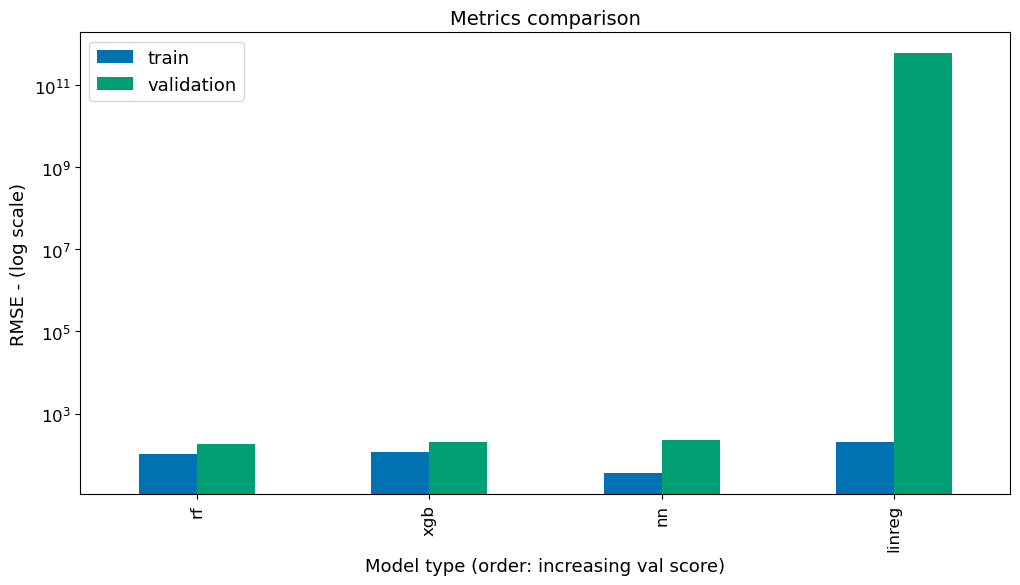

,xgb,linreg,nn,rf
data_transform,clr,None,ilr,None
data_alr_denom_idx,18,11,11,16
objective,reg:squarederror,NaN,NaN,NaN
max_depth,9,NaN,NaN,16
min_child_weight,2,NaN,NaN,NaN
subsample,0.7,NaN,NaN,NaN
eta,0.3,NaN,NaN,NaN
fit_intercept,NaN,True,NaN,NaN
n_layers,NaN,NaN,3,NaN
learning_rate,NaN,NaN,0.008007,NaN


In [20]:
metrics_all, best_configs = calc_best_metrics(
    {
        "xgb": result_dic["xgb"],
        "linreg": result_dic["linreg"],
        "nn": result_dic["nn"],
        "rf": result_dic["rf"],
    }
)
plot_best_metrics(metrics_all, ylog=True)
display(best_configs)

In [11]:
def _highlight_differing_cols(x):
    """
    Function returning color map of differing columns in x
    Original code used as base:
    https://stackoverflow.com/questions/41654949/pandas-style-function-to-highlight-specific-columns
    """
    # copy df to new - original data is not changed
    df = x.copy()

    # extract list of columns that differ between all models
    ls_col = df.columns[df.nunique(dropna=False) > 1].tolist()

    # select default neutral background
    df.loc[:, :] = "background-color: None"

    # mark columns that differ
    df[ls_col] = "color: red"

    # return colored df
    return df


best_configs.style.apply(_highlight_differing_cols, axis=None)

,xgb,linreg,nn,rf
data_transform,clr,None,ilr,None
data_alr_denom_idx,18,11,11,16
objective,reg:squarederror,nan,nan,nan
max_depth,9,nan,nan,16
min_child_weight,2,nan,nan,nan
subsample,0.700000,nan,nan,nan
eta,0.300000,nan,nan,nan
fit_intercept,nan,True,nan,nan
n_layers,nan,nan,3,nan
learning_rate,nan,nan,0.008007,nan


## Evaluate over training time (example for xgb model here)

<AxesSubplot: xlabel='training_iteration'>

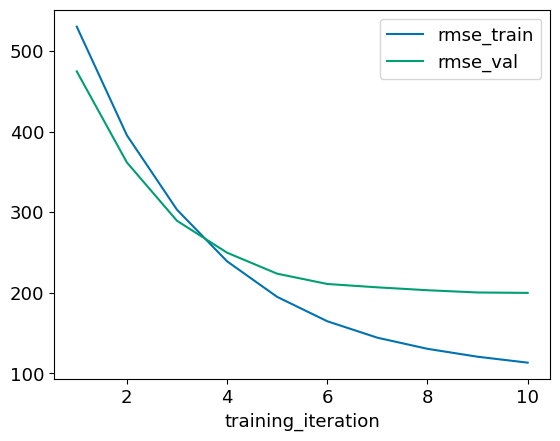

In [12]:
# Get the result with the maximum test set `mean_accuracy`
best_xgb = result_dic["xgb"].get_best_result()
best_xgb.metrics_dataframe.plot("training_iteration", ["rmse_train", "rmse_val"])

Text(0, 0.5, 'RMSE_val')

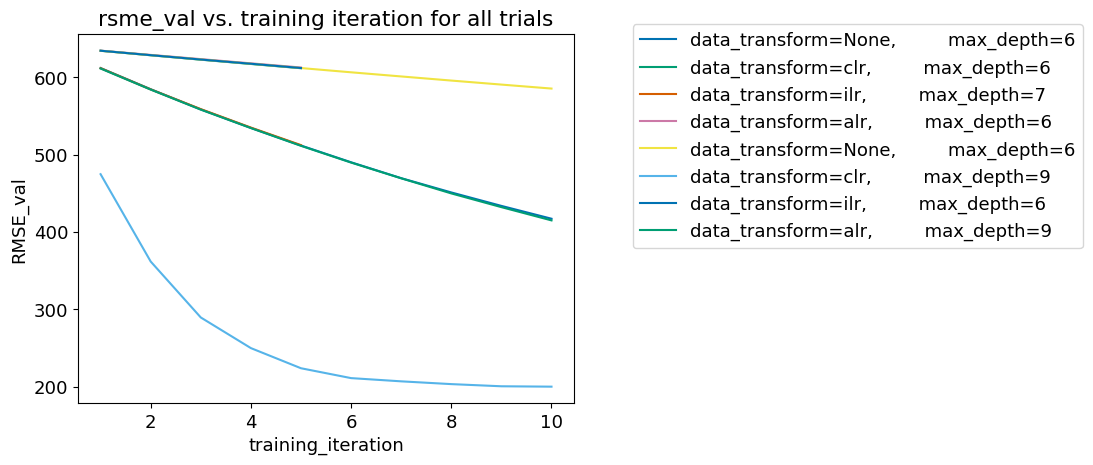

In [13]:
ax = None
for result in result_dic["xgb"]:
    label = f"data_transform={result.config['data_transform']}, \
        max_depth={result.config['max_depth']}"
    if ax is None:
        ax = result.metrics_dataframe.plot(
            "training_iteration", "rmse_val", label=label
        )
    else:
        result.metrics_dataframe.plot(
            "training_iteration", "rmse_val", ax=ax, label=label
        )
ax.legend(bbox_to_anchor=(1.1, 1.05))

ax.set_title("rsme_val vs. training iteration for all trials")
ax.set_ylabel("RMSE_val")